<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proses Pengambilan data**

In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [3]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

Problems slovlig tools = mencari akar permasalahan pada suatu masalah

5 why

metode mencari problems sloving dengan cara menanyakan apa penyebab permasalahaan muncul dan mencari jawabannya. hal ini di lakUkan berkali klai sampai permasalahan dapat tergambar dengan jelas

action priority

diagram yang dapat di gunakan untuk mencari prioritas masalah berdasarkan impact atas benefit yang bisa diberikan dengan diagram ini kita memilih masalah yang impactnya mayoritas dari permasalahan yang ada.

fishbone digram

digram yang dapat di gunakan untuk merinci masalah dan membantu mencari akar masalah yang dapat dilihat dari beberapa point of view

flowchart/algo

metode pemecahan masalah dengan cara memetakan flow atau membuat pseudo algoritma yang untuk menentukan masalah dan cara untuk mencari solusinya secara sistematis

# **Data diproleh**

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a9e36908-f0e9-41a3-9c64-2abb91481416,Muhamad Basir,https://play-lh.googleusercontent.com/a-/AD_cM...,Bingung bgt mau hub cs caranya gmn.. Mau ngakt...,1,117,5.32.2,2023-06-10 15:44:50,None,NaT,5.32.2
1,b9406794-dbf1-4a90-9dcd-4973b6447004,Adhitia Okvianto,https://play-lh.googleusercontent.com/a-/AD_cM...,"Sangat membantu dalam berbelanja, mudah diguna...",5,0,5.33.1,2023-07-02 22:51:36,None,NaT,5.33.1
2,41a634f9-5db2-407e-b5fa-f64e821ee0bf,Huda Pria Kusuma,https://play-lh.googleusercontent.com/a-/AD_cM...,Saya mengunakan smartphone untuk membuka aplik...,1,1,5.33.1,2023-07-01 19:51:04,None,NaT,5.33.1
3,f3f51bca-44c6-4cc9-8700-3a1b743728be,jehan maulana,https://play-lh.googleusercontent.com/a-/AD_cM...,bukalapak makin kesini makin ga jelas pengirim...,1,1,5.33.1,2023-07-03 01:10:27,None,NaT,5.33.1
4,49c1c9ec-91d2-41e9-be0d-6e9980a80554,Dadang Setiaji,https://play-lh.googleusercontent.com/a-/AD_cM...,saldo dana yang tersambung tiba-tiba terpotong...,1,1,5.33.1,2023-07-03 03:13:03,None,NaT,5.33.1


In [5]:
len(df_busu.index) #count the number of data we got

1300

In [6]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,suparman parman,5,2020-11-25 08:10:01,Saya pernah belanja di bukalapak barang ditola...
1296,Neymar Akbar,1,2021-06-30 06:23:09,Aplikasi emang oke. Tapi kurir nya tidak bagus...
1297,Dede Supriyatna,5,2023-06-20 12:28:23,"Insya Allah barang sesuai pesanan bukan kw""an 👍👍"
1298,Anto Jabrik,1,2021-10-11 13:35:50,"Saya pengguna bukalapak selama 3 tahun, dan sa..."
1299,Pengguna Google,1,2018-10-15 21:35:46,Akhir akhir ini buka lapak selalu munculin ikl...


# **Perubahan Penamaan Pada Setiap Kolom**

In [7]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [8]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,suparman parman,5,2020-11-25 08:10:01,Saya pernah belanja di bukalapak barang ditola...
1296,Neymar Akbar,1,2021-06-30 06:23:09,Aplikasi emang oke. Tapi kurir nya tidak bagus...
1297,Dede Supriyatna,5,2023-06-20 12:28:23,"Insya Allah barang sesuai pesanan bukan kw""an 👍👍"
1298,Anto Jabrik,1,2021-10-11 13:35:50,"Saya pengguna bukalapak selama 3 tahun, dan sa..."
1299,Pengguna Google,1,2018-10-15 21:35:46,Akhir akhir ini buka lapak selalu munculin ikl...


In [9]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [10]:
import nltk

In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [12]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Muhamad Basir,1,2023-06-10 15:44:50,Bingung bgt mau hub cs caranya gmn.. Mau ngakt...
1,Adhitia Okvianto,5,2023-07-02 22:51:36,"Sangat membantu dalam berbelanja, mudah diguna..."
2,Huda Pria Kusuma,1,2023-07-01 19:51:04,Saya mengunakan smartphone untuk membuka aplik...
3,jehan maulana,1,2023-07-03 01:10:27,bukalapak makin kesini makin ga jelas pengirim...
4,Dadang Setiaji,1,2023-07-03 03:13:03,saldo dana yang tersambung tiba-tiba terpotong...


# **Case folding**

In [13]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

# **cleansing**

In [14]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [15]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [16]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [17]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

# **Tokenizing**

In [18]:
# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [19]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Muhamad Basir,1,2023-06-10 15:44:50,bingung bgt mau hub cs caranya gmn mau ngaktif...,"[bingung, bgt, mau, hub, cs, caranya, gmn, mau..."
1,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d..."
2,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,..."
3,jehan maulana,1,2023-07-03 01:10:27,bukalapak makin kesini makin ga jelas pengirim...,"[bukalapak, makin, kesini, makin, ga, jelas, p..."
4,Dadang Setiaji,1,2023-07-03 03:13:03,saldo dana yang tersambung tibatiba terpotong ...,"[saldo, dana, yang, tersambung, tibatiba, terp..."
...,...,...,...,...,...
1295,suparman parman,5,2020-11-25 08:10:01,saya pernah belanja di bukalapak barang ditola...,"[saya, pernah, belanja, di, bukalapak, barang,..."
1296,Neymar Akbar,1,2021-06-30 06:23:09,aplikasi emang oke tapi kurir nya tidak bagus ...,"[aplikasi, emang, oke, tapi, kurir, nya, tidak..."
1297,Dede Supriyatna,5,2023-06-20 12:28:23,insya allah barang sesuai pesanan bukan kwan,"[insya, allah, barang, sesuai, pesanan, bukan,..."
1298,Anto Jabrik,1,2021-10-11 13:35:50,saya pengguna bukalapak selama tahun dan say...,"[saya, pengguna, bukalapak, selama, tahun, dan..."


In [20]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [21]:
#Run This Code to Sort the Data By Date
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
135,Ida Asih Pratiwi,5,2023-07-03 13:20:39,bagusmemuaskan dan sangat membantu dikala memb...,"[bagusmemuaskan, dan, sangat, membantu, dikala..."
123,TMtv Official,5,2023-07-03 13:02:50,sekarang saya senang sekali belanja di bukalap...,"[sekarang, saya, senang, sekali, belanja, di, ..."
141,muslimarief bilardhi,5,2023-07-03 11:55:13,permisi min tolong dong limit paylternya di ta...,"[permisi, min, tolong, dong, limit, paylternya..."
437,sukron suheri,1,2023-07-03 11:41:12,ada fitur bukasend tapi malah bikin bingung di...,"[ada, fitur, bukasend, tapi, malah, bikin, bin..."
129,Gofur Fu,1,2023-07-03 11:02:48,penanganan lama kalo ada kendala ribet gak pun...,"[penanganan, lama, kalo, ada, kendala, ribet, ..."


In [22]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [23]:
import pandas as pd

# Assuming you have a DataFrame named ulasan with columns 'Ulasan_tokenize' and 'Ulasan_ears'

word_to_erase = 'nya'  # Replace 'word' with the word you want to erase

name_dataframe["ulasan_ears"] = name_dataframe['Ulasan_tokenize'].apply(lambda x: [word for word in x if word != word_to_erase])

print(name_dataframe)


         Nama pengguna  Rating                Date  \
0        Muhamad Basir       1 2023-06-10 15:44:50   
1     Adhitia Okvianto       5 2023-07-02 22:51:36   
2     Huda Pria Kusuma       1 2023-07-01 19:51:04   
3        jehan maulana       1 2023-07-03 01:10:27   
4       Dadang Setiaji       1 2023-07-03 03:13:03   
...                ...     ...                 ...   
1295   suparman parman       5 2020-11-25 08:10:01   
1296      Neymar Akbar       1 2021-06-30 06:23:09   
1297   Dede Supriyatna       5 2023-06-20 12:28:23   
1298       Anto Jabrik       1 2021-10-11 13:35:50   
1299   Pengguna Google       1 2018-10-15 21:35:46   

                                                 Ulasan  \
0     bingung bgt mau hub cs caranya gmn mau ngaktif...   
1     sangat membantu dalam berbelanja mudah digunak...   
2     saya mengunakan smartphone untuk membuka aplik...   
3     bukalapak makin kesini makin ga jelas pengirim...   
4     saldo dana yang tersambung tibatiba terpotong ... 

In [24]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears
0,Muhamad Basir,1,2023-06-10 15:44:50,bingung bgt mau hub cs caranya gmn mau ngaktif...,"[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, bgt, mau, hub, cs, caranya, gmn, mau..."
1,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d..."
2,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,..."
3,jehan maulana,1,2023-07-03 01:10:27,bukalapak makin kesini makin ga jelas pengirim...,"[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, ga, jelas, p..."
4,Dadang Setiaji,1,2023-07-03 03:13:03,saldo dana yang tersambung tibatiba terpotong ...,"[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp..."


In [25]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['ulasan_ears'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(saya, 6), (mau, 3), (fitur, 2), (live, 2), (...
1    [(dan, 2), (sangat, 1), (membantu, 1), (dalam,...
2    [(saya, 4), (untuk, 3), (dan, 3), (smartphone,...
3    [(di, 3), (makin, 2), (pengiriman, 2), (lama, ...
4    [(bukalapak, 2), (saya, 2), (tidak, 2), (saldo...
Name: ulasan_ears, dtype: object


In [26]:
print(name_dataframe.columns)

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears'],
      dtype='object')


In [27]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [bingung, bgt, mau, hub, cs, caranya, gmn, mau...
1       [sangat, membantu, dalam, berbelanja, mudah, d...
2       [saya, mengunakan, smartphone, untuk, membuka,...
3       [bukalapak, makin, kesini, makin, ga, jelas, p...
4       [saldo, dana, yang, tersambung, tibatiba, terp...
                              ...                        
1295    [saya, pernah, belanja, di, bukalapak, barang,...
1296    [aplikasi, emang, oke, tapi, kurir, nya, tidak...
1297    [insya, allah, barang, sesuai, pesanan, bukan,...
1298    [saya, pengguna, bukalapak, selama, tahun, dan...
1299    [akhir, akhir, ini, buka, lapak, selalu, muncu...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [28]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

# **Normalization**

In [29]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv (1).csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [30]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [31]:
name_dataframe.head(100)

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized
0,Muhamad Basir,1,2023-06-10 15:44:50,bingung bgt mau hub cs caranya gmn mau ngaktif...,"[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, banget, mau, hubungi, cs, caranya, b..."
1,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d..."
2,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,..."
3,jehan maulana,1,2023-07-03 01:10:27,bukalapak makin kesini makin ga jelas pengirim...,"[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, enggak, jela..."
4,Dadang Setiaji,1,2023-07-03 03:13:03,saldo dana yang tersambung tibatiba terpotong ...,"[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp..."
...,...,...,...,...,...,...,...
95,Fachrul Raji,1,2023-06-22 03:39:39,bintang dulu sampe uang kembali sebelumnya s...,"[bintang, dulu, sampe, uang, kembali, sebelumn...","[bintang, dulu, sampe, uang, kembali, sebelumn...","[bintang, dulu, sampai, uang, kembali, sebelum..."
96,Alfandi Th,1,2023-06-05 01:21:53,sekarang bukalapak sudah gak rekomended lagi s...,"[sekarang, bukalapak, sudah, gak, rekomended, ...","[sekarang, bukalapak, sudah, gak, rekomended, ...","[sekarang, bukalapak, sudah, enggak, rekomenda..."
97,Dwi Indarti,1,2023-06-06 04:19:17,setelah dibayar lunaspaylater tidak bisa dibua...,"[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,...","[setelah, dibayar, lunaspaylater, tidak, bisa,..."
98,Akhdan Khalilah,1,2023-06-15 20:47:35,perampok berkedok serbu seru dana refund belum...,"[perampok, berkedok, serbu, seru, dana, refund...","[perampok, berkedok, serbu, seru, dana, refund...","[perampok, berkedok, serbu, seru, dana, refund..."


In [32]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [bingung, banget, mau, hubungi, cs, caranya, b...
1       [sangat, membantu, dalam, berbelanja, mudah, d...
2       [saya, mengunakan, smartphone, untuk, membuka,...
3       [bukalapak, makin, kesini, makin, enggak, jela...
4       [saldo, dana, yang, tersambung, tibatiba, terp...
                              ...                        
1295    [saya, pernah, belanja, di, bukalapak, barang,...
1296    [aplikasi, memang, oke, tapi, kurir, nya, tida...
1297    [insya, allah, barang, sesuai, pesanan, bukan,...
1298    [saya, pengguna, bukalapak, selama, tahun, dan...
1299    [akhir, akhir, ini, buka, lapak, selalu, muncu...
Name: Ulasan_normalized, Length: 1300, dtype: object>

# **Stop Removal**

In [33]:
from nltk.corpus import stopwords

In [34]:
list_stopwords = stopwords.words('indonesian')

In [35]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal)

In [36]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed
0,Muhamad Basir,1,2023-06-10 15:44:50,bingung bgt mau hub cs caranya gmn mau ngaktif...,"[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, banget, mau, hubungi, cs, caranya, b...","[bingung, banget, hubungi, cs, ngaktifin, fitu..."
1,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya..."
2,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la..."
3,jehan maulana,1,2023-07-03 01:10:27,bukalapak makin kesini makin ga jelas pengirim...,"[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, enggak, jela...","[bukalapak, kesini, pengiriman, seler, setatus..."
4,Dadang Setiaji,1,2023-07-03 03:13:03,saldo dana yang tersambung tibatiba terpotong ...,"[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, tersambung, tibatiba, terpotong,..."
...,...,...,...,...,...,...,...,...
1295,suparman parman,5,2020-11-25 08:10:01,saya pernah belanja di bukalapak barang ditola...,"[saya, pernah, belanja, di, bukalapak, barang,...","[saya, pernah, belanja, di, bukalapak, barang,...","[saya, pernah, belanja, di, bukalapak, barang,...","[belanja, bukalapak, barang, ditolak, uang, ce..."
1296,Neymar Akbar,1,2021-06-30 06:23:09,aplikasi emang oke tapi kurir nya tidak bagus ...,"[aplikasi, emang, oke, tapi, kurir, nya, tidak...","[aplikasi, emang, oke, tapi, kurir, tidak, bag...","[aplikasi, memang, oke, tapi, kurir, nya, tida...","[aplikasi, oke, kurir, nya, bagus, pengiriman,..."
1297,Dede Supriyatna,5,2023-06-20 12:28:23,insya allah barang sesuai pesanan bukan kwan,"[insya, allah, barang, sesuai, pesanan, bukan,...","[insya, allah, barang, sesuai, pesanan, bukan,...","[insya, allah, barang, sesuai, pesanan, bukan,...","[insya, allah, barang, sesuai, pesanan, kwan]"
1298,Anto Jabrik,1,2021-10-11 13:35:50,saya pengguna bukalapak selama tahun dan say...,"[saya, pengguna, bukalapak, selama, tahun, dan...","[saya, pengguna, bukalapak, selama, tahun, dan...","[saya, pengguna, bukalapak, selama, tahun, dan...","[pengguna, bukalapak, perhatikan, makain, kesi..."


In [37]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.5 MB/s eta 0:00:00


In [38]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.8 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16518 sha256=8dc632e7e9dec9ee8bd0594e109772c370f4338b7d5ec2fa038ce060d7be1c44
  Stored in directory: /root/.cache/pip/wheels/00/7e/8c/438ea309a16ef1a9130849060f962e0d2c4e94b8a4314d5919
Successfully built swifter


# **Stemming**

In [39]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4747
------------------------
bingung : bingung
banget : banget
hubungi : hubung
cs : cs
ngaktifin : ngaktifin
fitur : fitur
live : live
chat : chat
mengasih : asih
feedback : feedback
aktif : aktif
lihat : lihat
transaksi : transaksi
pembelian : beli
klik : klik
tertulis : tulis
gangguan : ganggu
coba : coba
email : email
terkirim : kirim
aplikasi : aplikasi
tlol : tlol
membantu : bantu
berbelanja : belanja
mudah : mudah
ribet : ribet
kurangnya : kurang
dipromo : dipromo
ongkir : ongkir
jarang : jarang
berat : berat
terimakasih : terimakasih
mengunakan : mengunakan
smartphone : smartphone
membuka : buka
lamalama : lamalama
kepala : kepala
pusing : pusing
layoutnya : layoutnya
berantakan : beranta
cari : cari
merk : merk
xxx : xxx
tampilan : tampil
ponsel : ponsel
aksesoris : aksesoris
suku : suku
cadang : cadang
dll : dll
penantan : penantan
kolom : kolom
produknya : produk
tampilkan : tampil
rapi : rapi
rekan : rekan
bosan : bosan
jenuh : jenuh
melanjutkan : lanjut
pencairan : cair
b

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [40]:
name_dataframe["Ulasan_siap"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [41]:
name_dataframe.to_excel("tokped_text.xlsx")

In [42]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_siap'])

In [43]:
tokenize_ulasan = word_tokenize(ulasan)

In [44]:
tokenize_ulasan

['bingung',
 'banget',
 'hubung',
 'cs',
 'ngaktifin',
 'fitur',
 'live',
 'chat',
 'asih',
 'feedback',
 'asih',
 'feedback',
 'fitur',
 'live',
 'chat',
 'aktif',
 'lihat',
 'transaksi',
 'beli',
 'klik',
 'tulis',
 'ganggu',
 'klik',
 'transaksi',
 'ganggu',
 'coba',
 'email',
 'kirim',
 'aplikasi',
 'tlol',
 'bantu',
 'belanja',
 'mudah',
 'ribet',
 'kurang',
 'dipromo',
 'ongkir',
 'jarang',
 'aplikasi',
 'berat',
 'terimakasih',
 'mengunakan',
 'smartphone',
 'buka',
 'aplikasi',
 'lamalama',
 'kepala',
 'pusing',
 'layoutnya',
 'beranta',
 'cari',
 'smartphone',
 'merk',
 'xxx',
 'tampil',
 'ponsel',
 'aksesoris',
 'suku',
 'cadang',
 'dll',
 'penantan',
 'kolom',
 'produk',
 'tampil',
 'rapi',
 'rekan',
 'bosan',
 'jenuh',
 'lanjut',
 'cair',
 'bukalapak',
 'kesini',
 'kirim',
 'seler',
 'setatus',
 'kirim',
 'aplikasi',
 'kirim',
 'kirim',
 'kadang',
 'suka',
 'batal',
 'pemberitahuan',
 'cepat',
 'aplikasi',
 'tiktok',
 'mah',
 'saldo',
 'dana',
 'sambung',
 'tibatiba',
 'pot

In [45]:
fqdist = FreqDist(tokenize_ulasan)

In [46]:
fqdist

FreqDist({'aplikasi': 522, 'bukalapak': 510, 'barang': 461, 'nya': 420, 'kirim': 268, 'buka': 250, 'beli': 246, 'pakai': 240, 'bayar': 240, 'belanja': 222, ...})

# **Mencetak 15 Kata Paling Banyak Digunakan**

In [47]:
fqdist.most_common(15)

[('aplikasi', 522),
 ('bukalapak', 510),
 ('barang', 461),
 ('nya', 420),
 ('kirim', 268),
 ('buka', 250),
 ('beli', 246),
 ('pakai', 240),
 ('bayar', 240),
 ('belanja', 222),
 ('lapak', 214),
 ('transaksi', 205),
 ('mudah', 164),
 ('jual', 163),
 ('bantu', 162)]

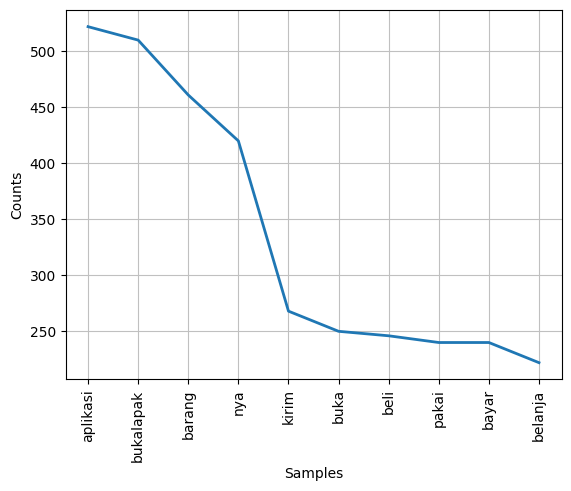

In [48]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [49]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label
0,Muhamad Basir,1,2023-06-10 15:44:50,bingung bgt mau hub cs caranya gmn mau ngaktif...,"[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, banget, mau, hubungi, cs, caranya, b...","[bingung, banget, hubungi, cs, ngaktifin, fitu...","[bingung, banget, hubung, cs, ngaktifin, fitur...",bingung banget hubung cs ngaktifin fitur live ...,0
1,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya...","[bantu, belanja, mudah, ribet, kurang, dipromo...",bantu belanja mudah ribet kurang dipromo ongki...,1
2,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la...","[mengunakan, smartphone, buka, aplikasi, lamal...",mengunakan smartphone buka aplikasi lamalama k...,0
3,jehan maulana,1,2023-07-03 01:10:27,bukalapak makin kesini makin ga jelas pengirim...,"[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, enggak, jela...","[bukalapak, kesini, pengiriman, seler, setatus...","[bukalapak, kesini, kirim, seler, setatus, kir...",bukalapak kesini kirim seler setatus kirim apl...,0
4,Dadang Setiaji,1,2023-07-03 03:13:03,saldo dana yang tersambung tibatiba terpotong ...,"[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, tersambung, tibatiba, terpotong,...","[saldo, dana, sambung, tibatiba, potong, vouch...",saldo dana sambung tibatiba potong voucher gam...,0
...,...,...,...,...,...,...,...,...,...,...,...
1295,suparman parman,5,2020-11-25 08:10:01,saya pernah belanja di bukalapak barang ditola...,"[saya, pernah, belanja, di, bukalapak, barang,...","[saya, pernah, belanja, di, bukalapak, barang,...","[saya, pernah, belanja, di, bukalapak, barang,...","[belanja, bukalapak, barang, ditolak, uang, ce...","[belanja, bukalapak, barang, tolak, uang, cepa...",belanja bukalapak barang tolak uang cepat bela...,1
1296,Neymar Akbar,1,2021-06-30 06:23:09,aplikasi emang oke tapi kurir nya tidak bagus ...,"[aplikasi, emang, oke, tapi, kurir, nya, tidak...","[aplikasi, emang, oke, tapi, kurir, tidak, bag...","[aplikasi, memang, oke, tapi, kurir, nya, tida...","[aplikasi, oke, kurir, nya, bagus, pengiriman,...","[aplikasi, oke, kurir, nya, bagus, kirim, pick...",aplikasi oke kurir nya bagus kirim pick up uba...,0
1297,Dede Supriyatna,5,2023-06-20 12:28:23,insya allah barang sesuai pesanan bukan kwan,"[insya, allah, barang, sesuai, pesanan, bukan,...","[insya, allah, barang, sesuai, pesanan, bukan,...","[insya, allah, barang, sesuai, pesanan, bukan,...","[insya, allah, barang, sesuai, pesanan, kwan]","[insya, allah, barang, sesuai, pesan, kwan]",insya allah barang sesuai pesan kwan,1
1298,Anto Jabrik,1,2021-10-11 13:35:50,saya pengguna bukalapak selama tahun dan say...,"[saya, pengguna, bukalapak, selama, tahun, dan...","[saya, pengguna, bukalapak, selama, tahun, dan...","[saya, pengguna, bukalapak, selama, tahun, dan...","[pengguna, bukalapak, perhatikan, makain, kesi...","[guna, bukalapak, perhati, makain, kesini, men...",guna bukalapak perhati makain kesini menu faed...,0


# **Subjekvity dan Polarity**

In [50]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment

def getSentiment(value):
    if value < 0:
        return 'Negative'
    elif value > 0:
        return 'Positive'
    else:
        return 'Neutral'


In [51]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label
0,Muhamad Basir,1,2023-06-10 15:44:50,bingung bgt mau hub cs caranya gmn mau ngaktif...,"[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, banget, mau, hubungi, cs, caranya, b...","[bingung, banget, hubungi, cs, ngaktifin, fitu...","[bingung, banget, hubung, cs, ngaktifin, fitur...",bingung banget hubung cs ngaktifin fitur live ...,0
1,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya...","[bantu, belanja, mudah, ribet, kurang, dipromo...",bantu belanja mudah ribet kurang dipromo ongki...,1
2,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la...","[mengunakan, smartphone, buka, aplikasi, lamal...",mengunakan smartphone buka aplikasi lamalama k...,0
3,jehan maulana,1,2023-07-03 01:10:27,bukalapak makin kesini makin ga jelas pengirim...,"[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, enggak, jela...","[bukalapak, kesini, pengiriman, seler, setatus...","[bukalapak, kesini, kirim, seler, setatus, kir...",bukalapak kesini kirim seler setatus kirim apl...,0
4,Dadang Setiaji,1,2023-07-03 03:13:03,saldo dana yang tersambung tibatiba terpotong ...,"[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, tersambung, tibatiba, terpotong,...","[saldo, dana, sambung, tibatiba, potong, vouch...",saldo dana sambung tibatiba potong voucher gam...,0


In [52]:
from textblob import TextBlob


In [53]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [54]:
name_dataframe['Polarity']=name_dataframe['Ulasan_siap'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_siap'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label,Polarity,Subjectivity,Sentiment
0,Muhamad Basir,1,2023-06-10 15:44:50,bingung bgt mau hub cs caranya gmn mau ngaktif...,"[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, banget, mau, hubungi, cs, caranya, b...","[bingung, banget, hubungi, cs, ngaktifin, fitu...","[bingung, banget, hubung, cs, ngaktifin, fitur...",bingung banget hubung cs ngaktifin fitur live ...,0,0.136364,0.5,Positive
1,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya...","[bantu, belanja, mudah, ribet, kurang, dipromo...",bantu belanja mudah ribet kurang dipromo ongki...,1,0.000000,0.0,Neutral
2,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la...","[mengunakan, smartphone, buka, aplikasi, lamal...",mengunakan smartphone buka aplikasi lamalama k...,0,0.000000,0.0,Neutral
3,jehan maulana,1,2023-07-03 01:10:27,bukalapak makin kesini makin ga jelas pengirim...,"[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, enggak, jela...","[bukalapak, kesini, pengiriman, seler, setatus...","[bukalapak, kesini, kirim, seler, setatus, kir...",bukalapak kesini kirim seler setatus kirim apl...,0,0.000000,0.0,Neutral
4,Dadang Setiaji,1,2023-07-03 03:13:03,saldo dana yang tersambung tibatiba terpotong ...,"[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, tersambung, tibatiba, terpotong,...","[saldo, dana, sambung, tibatiba, potong, vouch...",saldo dana sambung tibatiba potong voucher gam...,0,-0.400000,0.4,Negative


In [55]:
name_dataframe['month'] = name_dataframe['Date'].dt.month

In [56]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label,Polarity,Subjectivity,Sentiment,month
0,Muhamad Basir,1,2023-06-10 15:44:50,bingung bgt mau hub cs caranya gmn mau ngaktif...,"[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, bgt, mau, hub, cs, caranya, gmn, mau...","[bingung, banget, mau, hubungi, cs, caranya, b...","[bingung, banget, hubungi, cs, ngaktifin, fitu...","[bingung, banget, hubung, cs, ngaktifin, fitur...",bingung banget hubung cs ngaktifin fitur live ...,0,0.136364,0.5,Positive,6
1,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya...","[bantu, belanja, mudah, ribet, kurang, dipromo...",bantu belanja mudah ribet kurang dipromo ongki...,1,0.000000,0.0,Neutral,7
2,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la...","[mengunakan, smartphone, buka, aplikasi, lamal...",mengunakan smartphone buka aplikasi lamalama k...,0,0.000000,0.0,Neutral,7
3,jehan maulana,1,2023-07-03 01:10:27,bukalapak makin kesini makin ga jelas pengirim...,"[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, ga, jelas, p...","[bukalapak, makin, kesini, makin, enggak, jela...","[bukalapak, kesini, pengiriman, seler, setatus...","[bukalapak, kesini, kirim, seler, setatus, kir...",bukalapak kesini kirim seler setatus kirim apl...,0,0.000000,0.0,Neutral,7
4,Dadang Setiaji,1,2023-07-03 03:13:03,saldo dana yang tersambung tibatiba terpotong ...,"[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, yang, tersambung, tibatiba, terp...","[saldo, dana, tersambung, tibatiba, terpotong,...","[saldo, dana, sambung, tibatiba, potong, vouch...",saldo dana sambung tibatiba potong voucher gam...,0,-0.400000,0.4,Negative,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,suparman parman,5,2020-11-25 08:10:01,saya pernah belanja di bukalapak barang ditola...,"[saya, pernah, belanja, di, bukalapak, barang,...","[saya, pernah, belanja, di, bukalapak, barang,...","[saya, pernah, belanja, di, bukalapak, barang,...","[belanja, bukalapak, barang, ditolak, uang, ce...","[belanja, bukalapak, barang, tolak, uang, cepa...",belanja bukalapak barang tolak uang cepat bela...,1,0.000000,0.0,Neutral,11
1296,Neymar Akbar,1,2021-06-30 06:23:09,aplikasi emang oke tapi kurir nya tidak bagus ...,"[aplikasi, emang, oke, tapi, kurir, nya, tidak...","[aplikasi, emang, oke, tapi, kurir, tidak, bag...","[aplikasi, memang, oke, tapi, kurir, nya, tida...","[aplikasi, oke, kurir, nya, bagus, pengiriman,...","[aplikasi, oke, kurir, nya, bagus, kirim, pick...",aplikasi oke kurir nya bagus kirim pick up uba...,0,0.000000,0.0,Neutral,6
1297,Dede Supriyatna,5,2023-06-20 12:28:23,insya allah barang sesuai pesanan bukan kwan,"[insya, allah, barang, sesuai, pesanan, bukan,...","[insya, allah, barang, sesuai, pesanan, bukan,...","[insya, allah, barang, sesuai, pesanan, bukan,...","[insya, allah, barang, sesuai, pesanan, kwan]","[insya, allah, barang, sesuai, pesan, kwan]",insya allah barang sesuai pesan kwan,1,0.000000,0.0,Neutral,6
1298,Anto Jabrik,1,2021-10-11 13:35:50,saya pengguna bukalapak selama tahun dan say...,"[saya, pengguna, bukalapak, selama, tahun, dan...","[saya, pengguna, bukalapak, selama, tahun, dan...","[saya, pengguna, bukalapak, selama, tahun, dan...","[pengguna, bukalapak, perhatikan, makain, kesi...","[guna, bukalapak, perhati, makain, kesini, men...",guna bukalapak perhati makain kesini me

In [57]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# **Visualisasi Bobot Nilai**

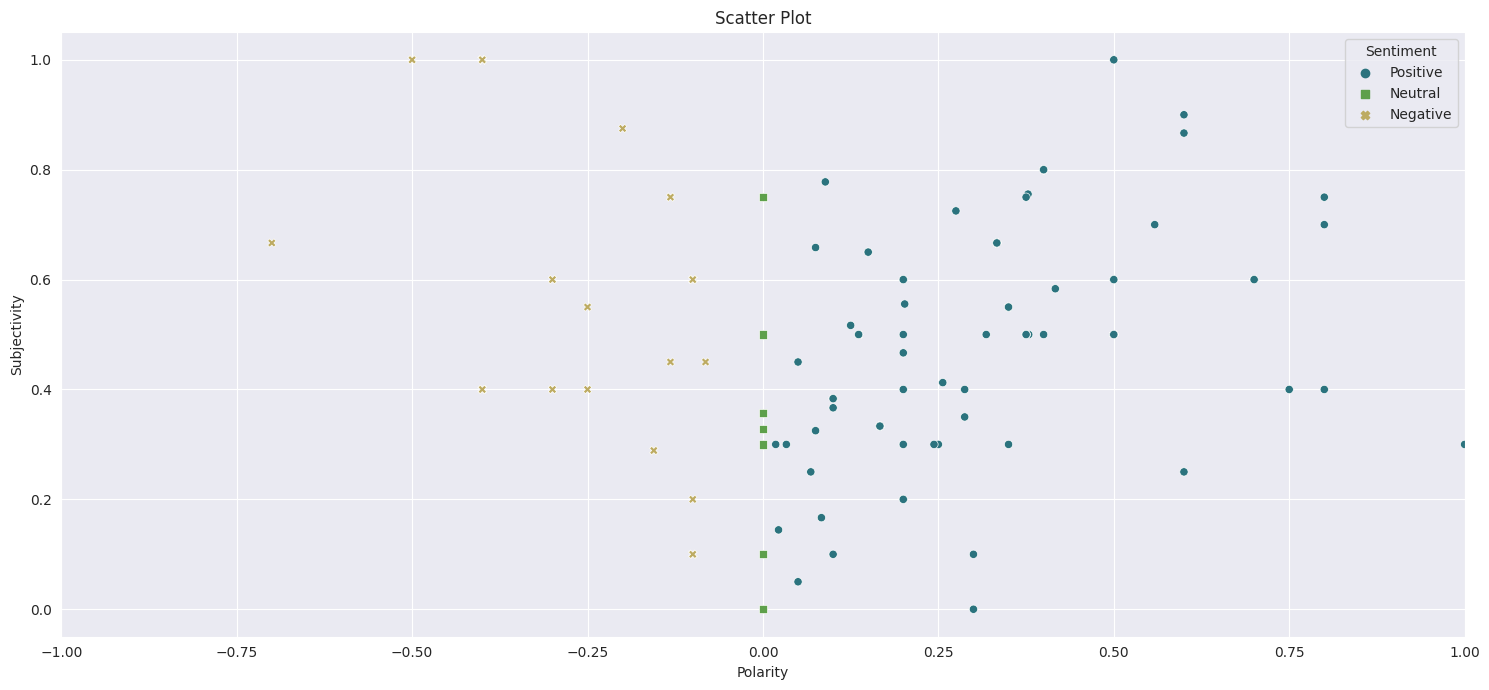

In [58]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

# **Visualiasi Polarity dan subjecvity perbulan**

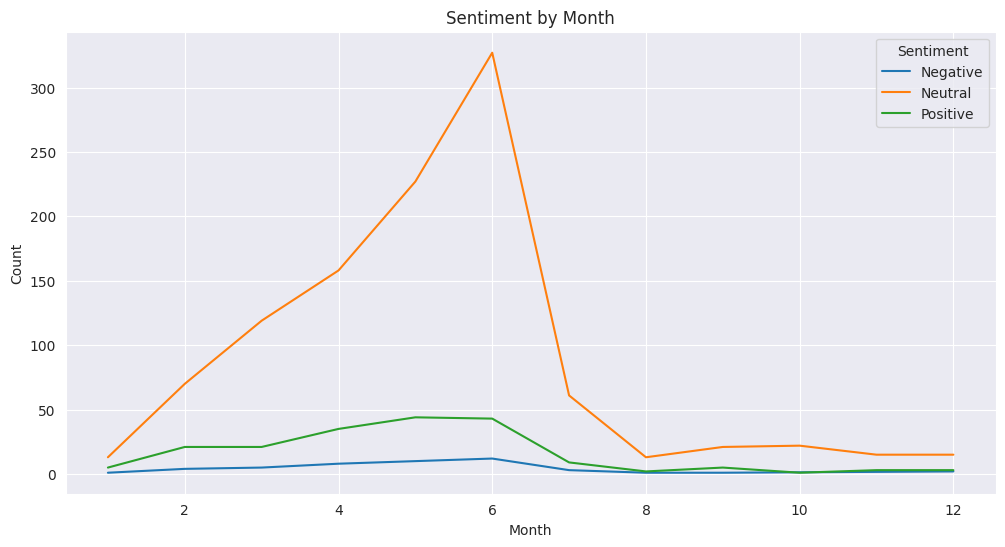

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and sentiment
sentiment_df = name_dataframe.groupby(['month', 'Sentiment']).size().reset_index(name='Count')


# Plot the sentiment counts by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Count', hue='Sentiment', data=sentiment_df)
plt.title('Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

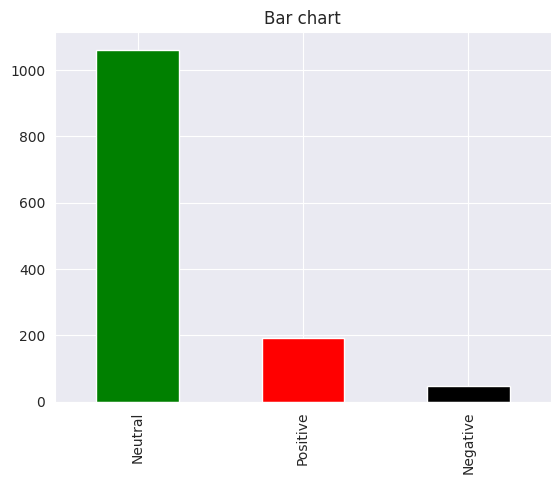

In [60]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [61]:
name_dataframe["Sentiment"].value_counts()

Neutral     1061
Positive     192
Negative      47
Name: Sentiment, dtype: int64

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [63]:
Ulasan = name_dataframe['Ulasan_siap']

In [64]:
Ulasan.isnull().sum()

0

# **Proses (TF-IDF)**

In [65]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3818


In [66]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata

{'bingung': 483,
 'banget': 277,
 'hubung': 1359,
 'cs': 797,
 'ngaktifin': 2299,
 'fitur': 1156,
 'live': 1972,
 'chat': 735,
 'asih': 199,
 'feedback': 1145,
 'aktif': 80,
 'lihat': 1958,
 'transaksi': 3586,
 'beli': 377,
 'klik': 1722,
 'tulis': 3630,
 'ganggu': 1205,
 'coba': 757,
 'email': 1074,
 'kirim': 1710,
 'aplikasi': 179,
 'tlol': 3546,
 'bantu': 291,
 'belanja': 365,
 'mudah': 2239,
 'ribet': 2921,
 'kurang': 1809,
 'dipromo': 965,
 'ongkir': 2437,
 'jarang': 1485,
 'berat': 408,
 'terimakasih': 3460,
 'mengunakan': 2166,
 'smartphone': 3251,
 'buka': 586,
 'lamalama': 1864,
 'kepala': 1665,
 'pusing': 2807,
 'layoutnya': 1912,
 'beranta': 407,
 'cari': 695,
 'merk': 2185,
 'xxx': 3792,
 'tampil': 3378,
 'ponsel': 2726,
 'aksesoris': 79,
 'suku': 3323,
 'cadang': 675,
 'dll': 1000,
 'penantan': 2614,
 'kolom': 1736,
 'produk': 2766,
 'rapi': 2830,
 'rekan': 2866,
 'bosan': 558,
 'jenuh': 1520,
 'lanjut': 1886,
 'cair': 676,
 'bukalapak': 601,
 'kesini': 1685,
 'seler': 309

In [67]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 80)	1
  (0, 179)	1
  (0, 199)	2
  (0, 277)	1
  (0, 377)	1
  (0, 483)	1
  (0, 735)	2
  (0, 757)	1
  (0, 797)	1
  (0, 1074)	1
  (0, 1145)	2
  (0, 1156)	2
  (0, 1205)	2
  (0, 1359)	1
  (0, 1710)	1
  (0, 1722)	2
  (0, 1958)	1
  (0, 1972)	2
  (0, 2299)	1
  (0, 3546)	1
  (0, 3586)	2
  (0, 3630)	1
  (1, 179)	1
  (1, 291)	1
  (1, 365)	1
  :	:
  (1298, 2777)	1
  (1298, 2778)	1
  (1298, 3432)	1
  (1299, 179)	1
  (1299, 486)	1
  (1299, 515)	1
  (1299, 586)	5
  (1299, 660)	1
  (1299, 1205)	1
  (1299, 1336)	1
  (1299, 1351)	1
  (1299, 1369)	2
  (1299, 1380)	4
  (1299, 1594)	1
  (1299, 1597)	2
  (1299, 1605)	1
  (1299, 1889)	3
  (1299, 1911)	2
  (1299, 1932)	1
  (1299, 2044)	1
  (1299, 2230)	1
  (1299, 2251)	2
  (1299, 2253)	1
  (1299, 2361)	1
  (1299, 3401)	1


In [68]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

bantu belanja mudah ribet kurang dipromo ongkir jarang aplikasi berat terimakasih


In [69]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 179)	1
  (0, 291)	1
  (0, 365)	1
  (0, 408)	1
  (0, 965)	1
  (0, 1485)	1
  (0, 1809)	1
  (0, 2239)	1
  (0, 2437)	1
  (0, 2921)	1
  (0, 3460)	1


In [70]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  7.4777413  6.56145057 ... 6.78459412 7.4777413  7.4777413 ]
  (0, 3460)	0.31352058406358124
  (0, 2921)	0.2661479215837874
  (0, 2437)	0.2720946536915369
  (0, 2239)	0.22218101806591856
  (0, 1809)	0.3441405224520307
  (0, 1485)	0.40106511778151205
  (0, 965)	0.48334980261296223
  (0, 408)	0.2897158050357108
  (0, 365)	0.20239498446428456
  (0, 291)	0.21644246249814897
  (0, 179)	0.15103292777418031


In [71]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_siap", "Sentiment"]]

In [72]:
data_label["Ulasan_siap"] = data_label["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-72-63aa05b24bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_siap"] = data_label["Ulasan_siap"].fillna("tidak ada komentar")


In [73]:
data_label.to_excel("data_label.xlsx")

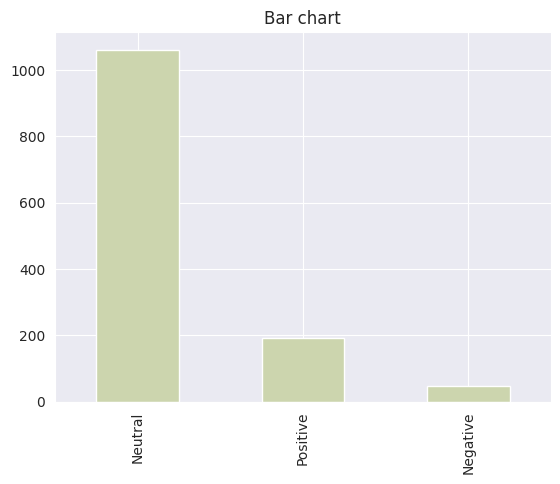

In [74]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

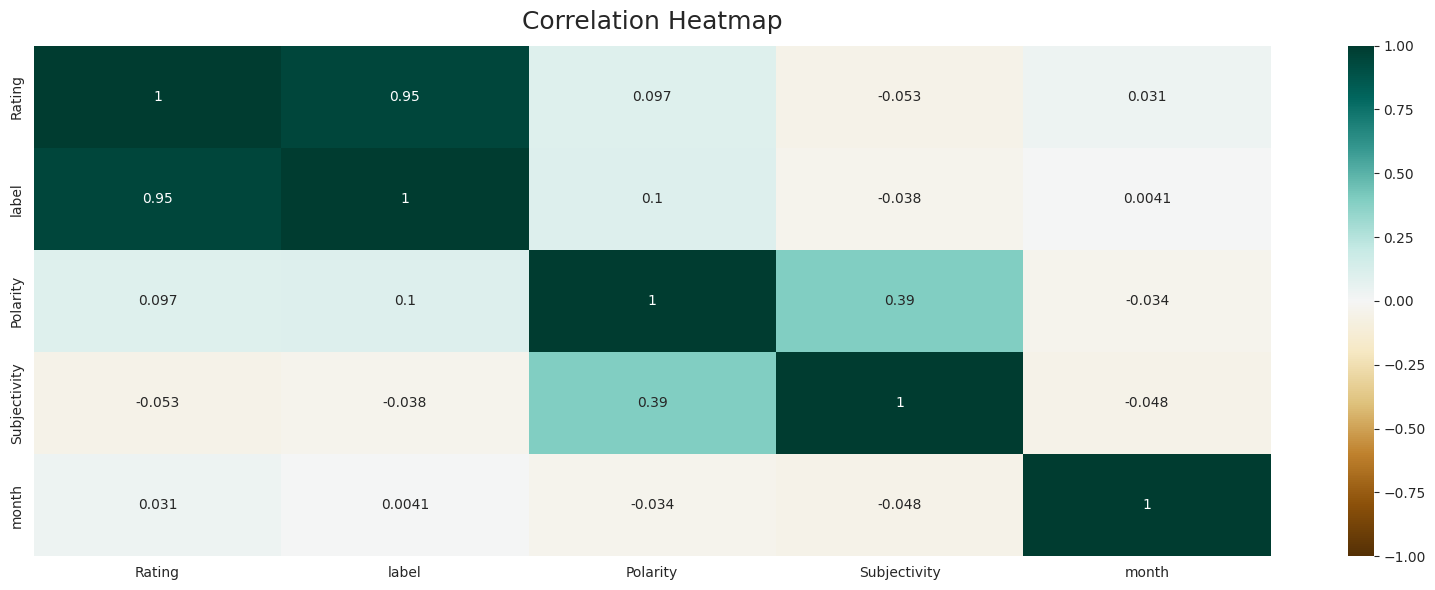

In [75]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [76]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears', 'Ulasan_normalized', 'Ulasan_stop_removed',
       'Ulasan_Stemmed', 'Ulasan_siap', 'label', 'Polarity', 'Subjectivity',
       'Sentiment', 'month'],
      dtype='object')

In [77]:
train_s3 = data_label[data_label["Sentiment"] == 'Neutral']

# **Proses visualiasi kata terbanyak dari Neutral**

In [78]:
train_s3["Ulasan_siap"] = train_s3["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-78-4fc6d4cc0ecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s3["Ulasan_siap"] = train_s3["Ulasan_siap"].fillna("tidak ada komentar")


Neutral words


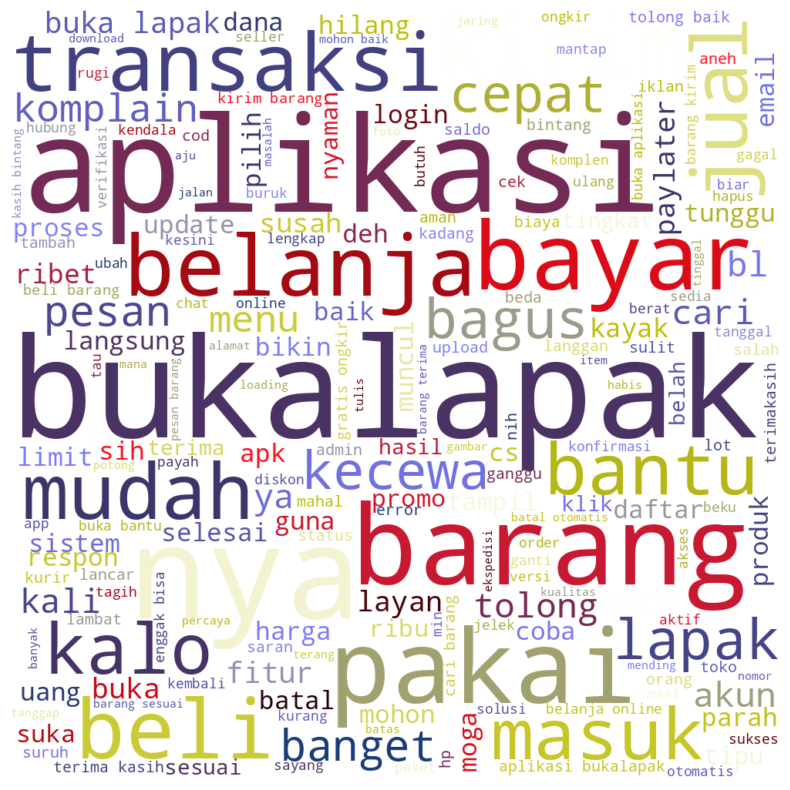

In [79]:
all_text_s0 = ' '.join(word for word in train_s3["Ulasan_siap"])
wordcloud = WordCloud(colormap='gist_stern', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Neutral words")
plt.show()

In [80]:
from wordcloud import WordCloud

In [81]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [82]:
train_s0["Ulasan_siap"] = train_s0["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-82-dc46e426e77c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_siap"] = train_s0["Ulasan_siap"].fillna("tidak ada komentar")


In [83]:
train_s0

,Nama pengguna,Ulasan_siap,Sentiment
4,Dadang Setiaji,saldo dana sambung tibatiba potong voucher gam...,Negative
45,agus jatnika,kasih bintang segitu blapak buka detail pesan ...,Negative
115,hidayat mudaris,tolong rumit verifikasi akun saldo bukalapak p...,Negative
155,Afifur Rohman,aplikasi bagus minus ongkir mahal voucher paka...,Negative
176,Kaloka Galih Kayu Wangi,jual emas bukaemas susah banget banget problem...,Negative
181,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative
214,Ilham Padka Wijaya,bukalapak marketplace nya sellerseller tipu ka...,Negative
232,Sutris Trisno,guna setia bltp perlahan alih toko online lain...,Negative
254,Farhan Fiddin,beli emas buka emas tarik alas konekai masalah...,Negative
264,Dinnss Livina,pakai pinjol nya kredivo sadis biaya layan rib...,Negative


# **Proses visualiasi kata terbanyak dari Negatif**

Negatif words


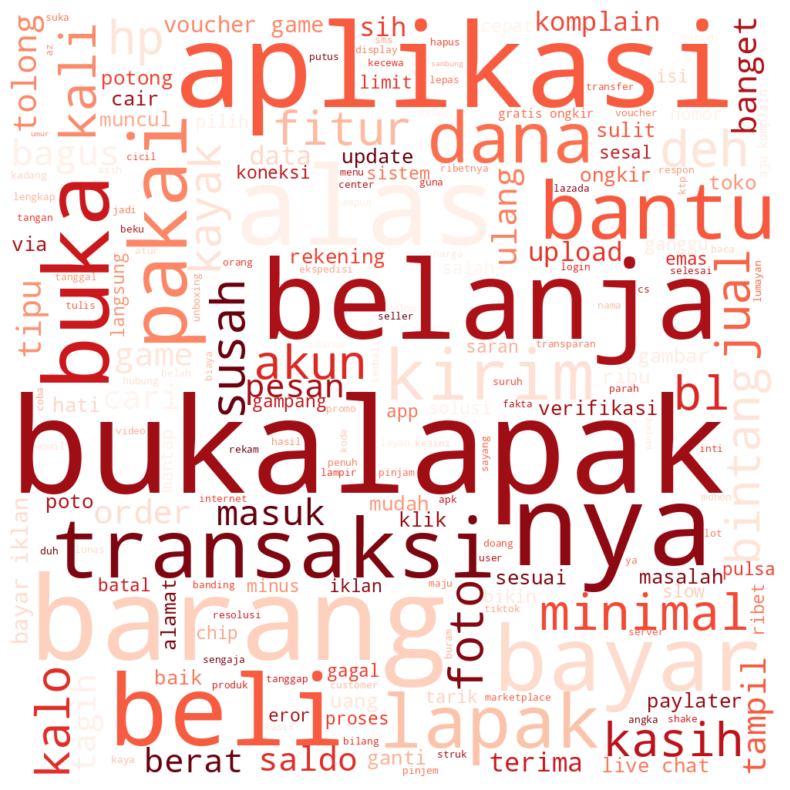

In [84]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_siap"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Negatif words")
plt.show()

# **Proses visualiasi kata terbanyak dari Positif**

In [85]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [86]:
train_s1["Ulasan_siap"] = train_s1["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-86-d1952b0b5859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_siap"] = train_s1["Ulasan_siap"].fillna("tidak ada komentar")


In [87]:
train_s1

,Nama pengguna,Ulasan_siap,Sentiment
0,Muhamad Basir,bingung banget hubung cs ngaktifin fitur live ...,Positive
8,Deni A#061,ayo ramai un install bukalapak mending pindah ...,Positive
10,Winny,paylater nya parah ya suka gagal gilir tagih a...,Positive
25,Dedy Hans Munthe,top up saldo dana bayar nya atm brisaldo poton...,Positive
34,Sultan Get,systemnya kalo layan tutup aplikasi langgan ke...,Positive
...,...,...,...
1262,ysppo hija,fitur chat jengkel delay parah boro asih notif...,Positive
1268,Pengguna Google,bilang flashdealnya jin hitung detik barang le...,Positive
1271,Puji Saputra,merchant buka lapak kalo bukabantuan live chat...,Positive
1285,Pengguna Google,good aplikasi sedia butuh barang produk adasay...,Positive


Positif words


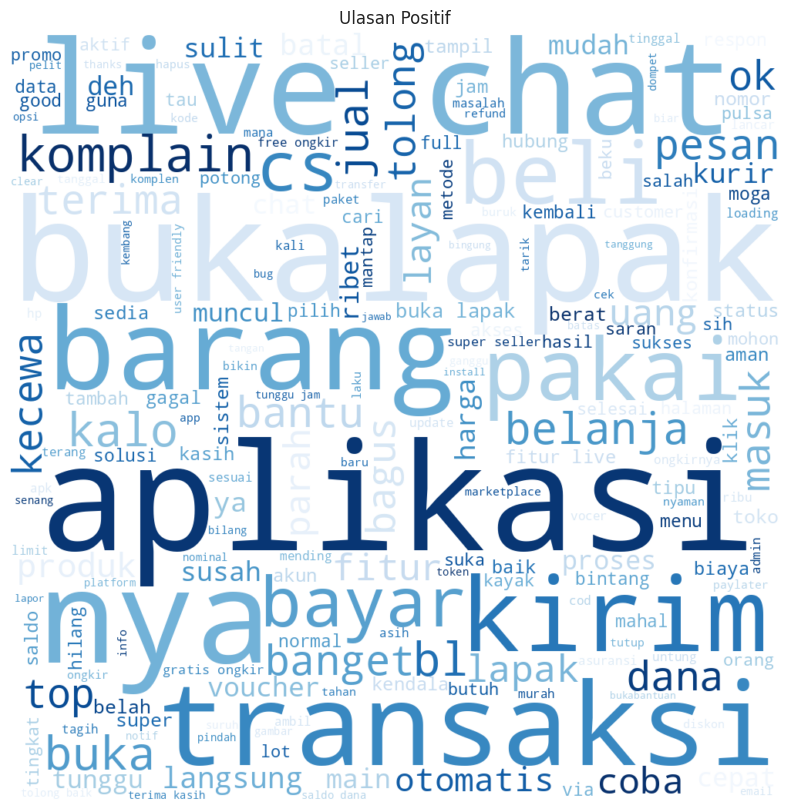

In [88]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_siap"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
print("Positif words")
plt.show()

In [89]:
data_label['Ulasan_clean'] = data_label['Ulasan_siap'].fillna("tidak ada komentar")

<ipython-input-89-2ed151e306fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_siap'].fillna("tidak ada komentar")


# **Mensplit Data Ulasan Siap Dan Data Sentiment**

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_siap'], data_label['Sentiment'],
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# **Melakukan Pembelajaran Melihat Akurasi Dan Mendapatkan Kolom Baru Prediksi**

In [91]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [135]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_label['Ulasan_siap'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_label['Sentiment'], test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

# Evaluate the classifier on the testing set
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

# Evaluate the classifier on the testing set
y_pred = gnb.predict(X_test.toarray())
cm = confusion_matrix(y_test, y_pred)

# Use the classifier to predict the sentiment class for all reviews in the dataset
data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())

# Save the resulting dataframe to a new CSV file
data_label.to_csv('predicted_sentiment1.csv', index=False)

Accuracy: 0.6038461538461538


<ipython-input-135-6b09eb5d31d3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())


In [94]:
import numpy as np

X_train = X_train.toarray()
X_test = X_test.toarray()


# **Melihat Akurasi Terbaik**



In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Gaussian Naive Bayes with original data
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print('Original Results:')
print(classification_report(y_test, y_gnb))
print(confusion_matrix(y_test, y_gnb))
print('Accuracy with original test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with undersampling
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_rus, y_rus)
y_gnb = gnb.predict(X_test)
print('Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with undersampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with oversampling
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_smote, y_smote)
y_gnb = gnb.predict(X_test)
print('Oversampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with oversampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with combined oversampling and undersampling
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=1)
X_smt, y_smt = smote.fit_resample(X_rus, y_rus)

gnb = GaussianNB()
gnb.fit(X_smt, y_smt)
y_gnb = gnb.predict(X_test)
print('Combined Oversampling and Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with combined oversampling and undersampling test data:', accuracy_score(y_test, y_gnb))


Original Results:
              precision    recall  f1-score   support

    Negative       0.05      0.08      0.06        12
     Neutral       0.88      0.63      0.74       215
    Positive       0.23      0.61      0.34        33

    accuracy                           0.60       260
   macro avg       0.39      0.44      0.38       260
weighted avg       0.76      0.60      0.65       260

[[  1   7   4]
 [ 17 136  62]
 [  1  12  20]]
Accuracy with original test data: 0.6038461538461538
Undersampling Results:
              precision    recall  f1-score   support

    Negative       0.07      0.50      0.12        12
     Neutral       0.89      0.38      0.53       215
    Positive       0.19      0.48      0.27        33

    accuracy                           0.40       260
   macro avg       0.38      0.45      0.31       260
weighted avg       0.76      0.40      0.48       260

Accuracy with undersampling test data: 0.39615384615384613
Oversampling Results:
              pre

In [96]:
import numpy as np

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [98]:
data_label['predicted_sentiment_class'].value_counts()

Neutral     894
Positive    322
Negative     84
Name: predicted_sentiment_class, dtype: int64

# **VISUALISASI Hasil Prediksi**

<Axes: >

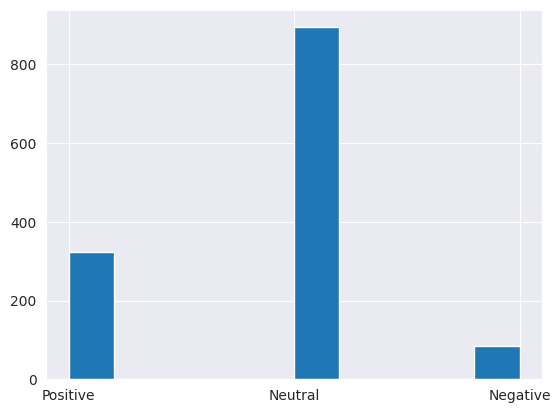

In [99]:
data_label['predicted_sentiment_class'].hist()

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **CrossValidation gaussion naive bayes**

**sample random**

mengambil secara acak dari daftar sample atau sampling frame yang tersedia setiap individu memiliki peluang yang sama untuk terpilih
peluang tersebut ada melakukan peluang sama ketika mempunyai data besar akan memliki peluang lebih besar untuk terpilih tetapi sebaliknya ketika mempunyai data dikit dapat peluang lebih sedikit

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_siap'], data_label['Sentiment'],
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create the Naive Bayes Classifier object
gnb = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)

# Fit the classifier to the training data
gnb.fit(X_train.toarray(), y_train)

# Predict the sentiment of the test data
y_pred = gnb.predict(X_test.toarray())

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Cross-validation scores: [0.61538462 0.58119658 0.56837607 0.54273504 0.58974359]
Confusion Matrix:
 [[ 1  3  1]
 [10 66 30]
 [ 0 14  5]]


In [102]:
# Convert sparse matrix to dense numpy array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Print the scores on the training and test sets
print('Training set score: {:.4f}'.format(gnb.score(X_train_dense, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_dense, y_test)))


Training set score: 0.8923
Test set score: 0.5538


In [103]:
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5538461538461539


In [104]:
vectorizer

TfidfVectorizer()

In [105]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

# **Data Prediksi**

In [106]:
data_label

,Nama pengguna,Ulasan_siap,Sentiment,Ulasan_clean,predicted_sentiment_class
0,Muhamad Basir,bingung banget hubung cs ngaktifin fitur live ...,Positive,bingung banget hubung cs ngaktifin fitur live ...,Positive
1,Adhitia Okvianto,bantu belanja mudah ribet kurang dipromo ongki...,Neutral,bantu belanja mudah ribet kurang dipromo ongki...,Neutral
2,Huda Pria Kusuma,mengunakan smartphone buka aplikasi lamalama k...,Neutral,mengunakan smartphone buka aplikasi lamalama k...,Neutral
3,jehan maulana,bukalapak kesini kirim seler setatus kirim apl...,Neutral,bukalapak kesini kirim seler setatus kirim apl...,Neutral
4,Dadang Setiaji,saldo dana sambung tibatiba potong voucher gam...,Negative,saldo dana sambung tibatiba potong voucher gam...,Negative
...,...,...,...,...,...
1295,suparman parman,belanja bukalapak barang tolak uang cepat bela...,Neutral,belanja bukalapak barang tolak uang cepat bela...,Neutral
1296,Neymar Akbar,aplikasi oke kurir nya bagus kirim pick up uba...,Neutral,aplikasi oke kurir nya bagus kirim pick up uba...,Neutral
1297,Dede Supriyatna,insya allah barang sesuai pesan kwan,Neutral,insya allah barang sesuai pesan kwan,Neutral
1298,Anto Jabrik,guna bukalapak perhati makain kesini menu faed...,Neutral,guna bukalapak perhati makain kesini menu faed...,Neutral


# **CONFIUSIN MATRIK**
melihat seberapa baik distribusi dari setiap kelas

In [107]:
cm = confusion_matrix(y_test,y_pred)

In [108]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred))

--------------------- confusion matrix  ----------------------------
[[ 1  3  1]
 [10 66 30]
 [ 0 14  5]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.09      0.20      0.13         5
     Neutral       0.80      0.62      0.70       106
    Positive       0.14      0.26      0.18        19

    accuracy                           0.55       130
   macro avg       0.34      0.36      0.34       130
weighted avg       0.67      0.55      0.60       130



In [109]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# **Melihat Kesalahan Classifikasi**

In [110]:
# print classification error kesalahan klasifikasi

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1625


In [111]:

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8375


<Axes: >

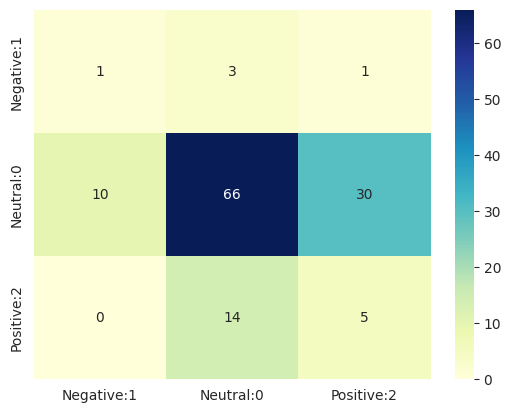

In [112]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'],
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [113]:
X_test

<130x3567 sparse matrix of type '<class 'numpy.float64'>'
	with 1637 stored elements in Compressed Sparse Row format>

In [114]:
X_train

<1170x3567 sparse matrix of type '<class 'numpy.float64'>'
	with 17096 stored elements in Compressed Sparse Row format>

In [115]:
y_test

370      Neutral
1252     Neutral
1066    Negative
1117     Neutral
1121     Neutral
          ...   
463      Neutral
1213    Positive
942      Neutral
238     Positive
422      Neutral
Name: Sentiment, Length: 130, dtype: object

In [116]:
y_train

927     Neutral
46      Neutral
1045    Neutral
1143    Neutral
666     Neutral
         ...   
531     Neutral
837     Neutral
1294    Neutral
675     Neutral
1139    Neutral
Name: Sentiment, Length: 1170, dtype: object

In [117]:
print(y_train)

927     Neutral
46      Neutral
1045    Neutral
1143    Neutral
666     Neutral
         ...   
531     Neutral
837     Neutral
1294    Neutral
675     Neutral
1139    Neutral
Name: Sentiment, Length: 1170, dtype: object


<Axes: >

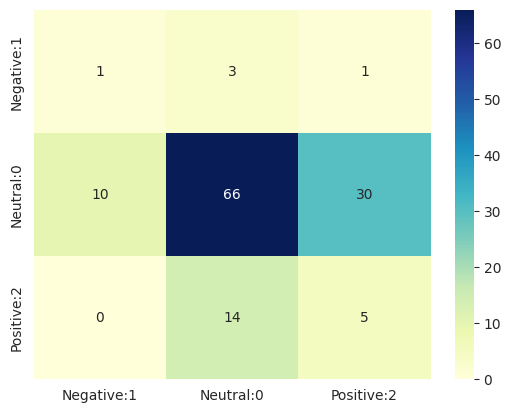

In [118]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'],
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')